Challenge: Write a Churn Simulator
==================================

- Start with a single customer in a random initial state (A, B, C)
 * What data type to use for the customer state?
- Change the state randomly using a transition probability matrix P
 * What values to use for the probability matrix?
 * What data type to use for the probability matrix
- Simulate N time steps in the same way
- write the sequence of states to an output file
 * What is the overall structure of the program?

--------------------------------------

- Do the same but for M customers
- Add new customers to the system at every time step
- Structure the code, clean it up, put it on GitHub etc.
 * What functions do I need?

--------------------------------------

OPTIONAL:

- Price the products, estimate customer lifetime value (CLV)
- Plot the number of customers in each state
- Try to find a steady state

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# create a list that contains all the possible states
STATES = ['Apple', 'Banana', 'Coffee', 'Doughnut', 'churned']

# create a list of all the states that can be initial states
INIT_STATES = ['Apple', 'Banana', 'Coffee', 'Doughnut']

# create a dictionary for the translation between state and vectorized state
D = {'Apple': 0, 'Banana': 1, 'Coffee': 2, 'Doughnut': 3, 'churned': 4}

# chose the number of periods for the simmulation
N = 10

# chose the number of simulations to run (initial nr. of customers)
M = 100

# create a dataframe for the output
output = pd.DataFrame()

Write a function that does the following:

1) creates an inital state from the list of all possible initial states

2) Vectorize the state

3) Calculates the transition probabilities given the initial state and the transition probability matrix

4) Does the same for n specified steps

5) Function returns the result to a DataFrame or file which is appendable

In [3]:
# create a random initial state
def simulate(initial_states, possible_states, transition_probabilities, nr_of_periods, output_frame):
    
    '''
    This function takes
    
    - a list of possible initial states
    - a list of possible states (after the initial stage)
    - transition probabilites between states (as DataFrame)
    - the nr. of periods that are supposed to be simulated
    - a count variable
    - the frame containing the output so far
    
    and it appends a purchase history to the output DataFrame
    '''
    
    # create a list to store the history
    history = []
    
    # create the initial state and save it in the history list
    state = np.asscalar(np.random.choice(initial_states, size=1))
    history.append(state)
    
    
    for i in range(nr_of_periods):
        # multiply state vector by the probability matrix to calculate transition probabilities
        transition_prob = transition_probabilities.loc[state]
    
        # implement the transition to a new state and save the new state in the history list
        state = np.asscalar(np.random.choice(possible_states, p=transition_prob, size=1))
        history.append(state)
    
    
    # append the output DataFrame
    history = pd.DataFrame(history, columns=[str(output_frame.shape[1] + 1)])
    output_frame = pd.concat([output_frame, history], axis=1)
    
    # return a DataFrame with the result
    return output_frame

1) Load the customer matrix and the transition probability matrix

In [4]:
cust = pd.read_csv('./data/customer_matrix.csv', index_col=0)
trans = pd.read_csv('./data/transition_probabilities.csv', index_col=0)

2) Start with a single customer in a random initial state (=random flavor)
 * What data type to use for the customer state?
 -> start with a numpy array

In [5]:
# Add the probabilites from the state 'churned'
churn_row = pd.DataFrame([[0, 0, 0, 0, 1]], columns=trans.columns)
trans = trans.append(churn_row)
trans = trans.rename({0: 'churned'}, axis='index')
trans

,Apple,Banana,Coffee,Doughnut,churned
Apple,0.092487,0.124075,0.103017,0.056915,0.623506
Banana,0.100091,0.144928,0.131793,0.072464,0.550725
Coffee,0.101566,0.146353,0.124572,0.099853,0.527655
Doughnut,0.063365,0.100584,0.113196,0.098431,0.624423
churned,0.000000,0.000000,0.000000,0.000000,1.000000


Write the program:

In [6]:
for i in range(M):
    output = simulate(INIT_STATES, STATES, trans, N, output)

In [7]:
# translate the numerical values
#for i, row in output.iterrows():
#    for r in row.index:
#        output.at[i, r] = float(D[output.at[i, r]])

In [8]:
output.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,Doughnut,Coffee,Banana,Apple,Banana,Coffee,Apple,Apple,Coffee,Doughnut,...,Coffee,Banana,Doughnut,Coffee,Doughnut,Apple,Coffee,Doughnut,Apple,Banana
1,churned,Doughnut,churned,churned,Banana,churned,churned,Banana,Doughnut,churned,...,Apple,Apple,Banana,Apple,churned,churned,churned,churned,churned,churned
2,churned,Doughnut,churned,churned,Banana,churned,churned,Coffee,Coffee,churned,...,Apple,churned,churned,Banana,churned,churned,churned,churned,churned,churned
3,churned,Banana,churned,churned,Coffee,churned,churned,Banana,churned,churned,...,Apple,churned,churned,Doughnut,churned,churned,churned,churned,churned,churned
4,churned,churned,churned,churned,churned,churned,churned,churned,churned,churned,...,churned,churned,churned,churned,churned,churned,churned,churned,churned,churned


In [9]:
#output.plot()

In [10]:
output = output.stack().unstack(0)
output.head()

,0,1,2,3,4,5,6,7,8,9,10
1,Doughnut,churned,churned,churned,churned,churned,churned,churned,churned,churned,churned
2,Coffee,Doughnut,Doughnut,Banana,churned,churned,churned,churned,churned,churned,churned
3,Banana,churned,churned,churned,churned,churned,churned,churned,churned,churned,churned
4,Apple,churned,churned,churned,churned,churned,churned,churned,churned,churned,churned
5,Banana,Banana,Banana,Coffee,churned,churned,churned,churned,churned,churned,churned


In [19]:
# create a dataframe containing the number of instances for each state in each period
num = pd.DataFrame()

for c in output.columns:
#    print(c)
    counts = []
    name = ''
    for state in STATES:
#        print(state)
        out = output[c].str.count(state).sum()
#        print(out)
        counts.append(out)
    counts = pd.Series(counts, name=f'{c}')
    num = pd.concat([num, counts], axis=1)
#    print(num)

In [20]:
# inverse the dictionary D
inv_D = {v: k for k, v in D.items()}
inv_D

{0: 'Apple', 1: 'Banana', 2: 'Coffee', 3: 'Doughnut', 4: 'churned'}

In [21]:
# rename the indices of the matrix
num = num.rename(mapper=inv_D, axis='index')
num

,0,1,2,3,4,5,6,7,8,9,10
Apple,21,9,2,1,0,0,0,0,0,0,0
Banana,33,12,10,5,1,0,0,0,0,0,0
Coffee,25,12,3,1,0,0,0,0,0,0,0
Doughnut,21,15,3,1,0,0,0,0,0,0,0
churned,0,52,82,92,99,100,100,100,100,100,100


Text(0,0.5,'Nr. of instances')

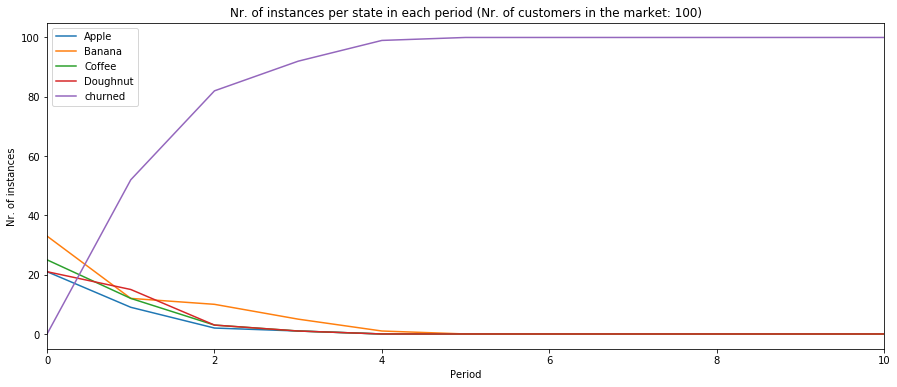

In [23]:
num.T.plot(figsize = (15, 6)\
          , title='Nr. of instances per state in each period (Nr. of customers in the market: {})'.format(M))\

plt.xlabel('Period')
plt.ylabel('Nr. of instances')